<a href="https://colab.research.google.com/github/TravelingEngineer/Sandbox/blob/master/Energy_Decay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [0]:
from __future__ import division #import python 3 updates for floating point division
from __future__ import print_function

import os
import math

from IPython.display import Audio
from scipy.io import wavfile
from scipy import signal
from scipy import stats

from matplotlib import cm
from matplotlib import gridspec
from matplotlib.colors import LogNorm
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt

import datetime
import numpy as np
from numpy import mean, sqrt, square, arange

import pandas as pd
from sklearn import metrics

**Mount Google Drive**

In [2]:
from google.colab import auth
from google.colab import files
#email Collins.AE6@gmail.com
#pswd machine_learning610
from google.colab import drive
drive.mount('/content/drive')

#Upload data from GoogleDrive
gDrive= '/content/drive/My Drive/energy_decay/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**View Folder Contents**

In [3]:
#check for data
!ls "/content/drive/My Drive/energy_decay"

female_counting_16.wav				test_16_bit.wav
Hamilton_Mausoleum_000_ORTF_44k_mono_16bit.wav


**Write Audio to Array**

In [4]:
#Audio files must be .wave 16-bit 44 kHz format
file_impulse = gDrive+'test_16_bit.wav'
#file_impulse = gDrive+'Hamilton_Mausoleum_000_ORTF_44k_mono_16bit.wav'

fs, impulse_response = wavfile.read(file_impulse)
#fs_original, sig_speech = wavfile.read(file_speech)

impulse_response = impulse_response.astype(np.float32) 
impulse_response /= 2**15 #normalizes 16 bit wavefile

#sig_speech=speech_anechoic[:,0] #discard stereo to create mono audio, use carefully!
#sig_speech = sig_speech[np.newaxis] #shape array for convolution with gaussian impulse
impulse_response.shape

(64000,)

**Play & Display Audio**

In [5]:
Audio(impulse_response, rate=fs)

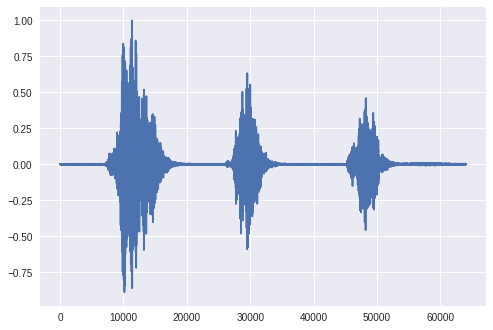

In [6]:
plt.plot(impulse_response)
plt.show()

In [0]:
#impulse_response_array=impulse_response[:,np.newaxis]
#impulse_response_array

In [0]:
#original audio file

#time = 2 #in seconds
#points_to_plot = fs*time

#impulse_response_cutoff = impulse_response_array[0:points_to_plot,:]
#impulse_response_cutoff.shape
#plt.plot(impulse_response_cutoff, label = 'original file', alpha = 0.5)

#hilbert transform of audio file

#fig, axs = plt.subplots(1, 2, figsize=(5, 10))

#axs[0, 0].plt.plot(analytical_impulse.real, label = 'analytic real part', color = 'red', alpha =0.5)
#axs[0, 1].plt.plot(analytical_impulse.imag, label = 'analytic imaginary part', color = 'blue', alpha = 0.5)

#analytical_impulse = signal.hilbert(impulse_response_cutoff)
#fig, ax = plt.subplots(1, 2, figsize=(10, 5))

#ax[0, 0].plot(analytical_impulse.real[0],analytical_impulse.real[1] )
#ax[0, 1].plot(analytical_impulse.imag[0],analytical_impulse.imag[1] )
#ax.legend()
#ax.set_xlabel('impulse response')
#ax.set_ylabel('time')
#ax.set_title('impulse vs time')

**Calculate envelope of impluse response signal with Hilbert Transform**

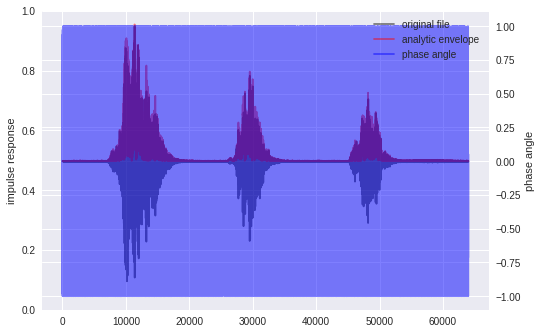

In [9]:
#original audio file
fig = plt.figure()
axes1 = fig.add_subplot(111) #set props for left y-axis here

axes1.set_ylabel('impulse response')
axes2 = axes1.twinx() #mirror axis
axes2.set_ylabel('phase angle')

#plot original impulse response
plt.plot(impulse_response, label = 'original file', color = 'black', alpha = 0.5)

analytical_impulse = signal.hilbert(impulse_response)
#plt.plot(analytical_impulse.real, label = 'analytic real part', color = 'red', alpha = 0.5)
#plt.plot(analytical_impulse.imag, label = 'analytic imaginary part', color = 'blue', alpha = 0.5)

envelope_analytical_impulse = np.abs(analytical_impulse)
plt.plot(envelope_analytical_impulse, label = 'analytic envelope', color = 'red', alpha = 0.5)

phase_radians =np.angle(analytical_impulse)
phase_angle = np.cos(phase_radians)
plt.plot(phase_angle, label = 'phase angle', color = 'blue', alpha = 0.5)

#display settings
#plt.ylabel('Impulse Response')
plt.xlabel('Time [samples]')
plt.legend()

#calculates segement of file to display
#time = 2 #in seconds
#points_to_plot = fs*time
#plt.xlim(0.014*fs,0.025*fs) #(0.014*fs,0.025*fs)
#plt.ylim(-0.1,0.1)

plt.show()

In [10]:
Audio(phase_angle, rate=fs)

**Calculate instantaneous frequency of impulse response**

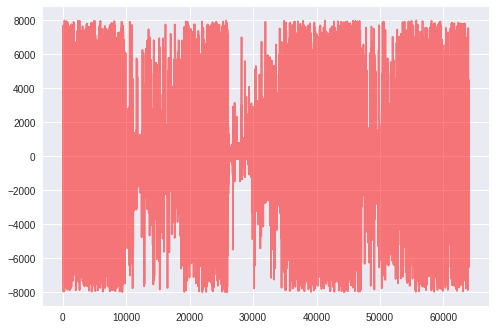

In [11]:
phase_radians =np.angle(analytical_impulse)
phase_angle = np.cos(phase_radians)
#plt.plot(phase_angle, label = 'phase', color = 'blue', alpha = 0.5)

instant_phase = np.unwrap(np.angle(analytical_impulse)) #inst phase
#plt.plot(instant_phase, label = 'instant_frequency', color = 'blue', alpha = 0.5)

instant_freq = np.diff(instant_phase)/(2*np.pi)*fs #inst frequency
plt.plot(instant_freq, label = 'instant_phase', color = 'red', alpha = 0.5)

#plt.xlim(0.012*fs,0.02*fs)
#plt.ylim(-np.pi,np.pi)
plt.show()

In [12]:
Audio(instant_freq, rate=fs)

**Schroeder integration of impulse response**

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


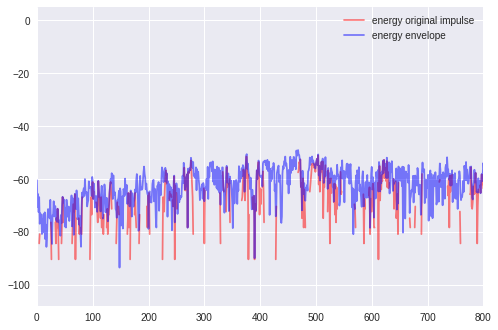

In [13]:
#convert envelope of signal to decibel scale
energy_original_impulse = 20*np.log10(impulse_response/max(impulse_response))
energy_envelope = 20*np.log10(envelope_analytical_impulse/(max(envelope_analytical_impulse)))

plt.plot(energy_original_impulse, label = 'energy original impulse', color = 'red', alpha = 0.5)
plt.plot(energy_envelope, label = 'energy envelope', color = 'blue', alpha = 0.5)
plt.xlim(0.025,0.05*fs) #(0.014*fs,0.025*fs)
plt.legend()

plt.show()

In [14]:
#https://stackoverflow.com/questions/6148207/linear-regression-with-matplotlib-numpy/27363639#27363639

energy_impulse_response = 20*np.log10(impulse_response/(max(impulse_response)))

sch = np.cumsum(impulse_response[::-1]**2)[::-1]
sch2 = np.sum(impulse_response[::1]**2)
sch_db = 10*np.log10(sch/sch2)

# Linear regression
init=-5 #inital dB 
end = -35 #final dB 

sch_init = sch_db[np.abs(sch_db - init).argmin()]
sch_end = sch_db[np.abs(sch_db - end).argmin()]
init_sample = np.where(sch_db == sch_init)[0][0]
end_sample = np.where(sch_db == sch_end)[0][0]

x = np.arange(init_sample, end_sample + 1) / fs
y = sch_db[init_sample: end_sample + 1]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

t30_slope=slope*x+intercept

# Reverberation time (T30, T20, T10 or EDT)
db_regress_init = (init - intercept) / slope
db_regress_end = (end - intercept) / slope
t30 = (db_regress_end[-1] - db_regress_init[0])
       #/t30_slope)/fs

plt.plot(sch_db, label = 'schroeder decay curve', color = 'red', alpha = 0.5)
plt.plot(energy_impulse_response, label = 'energy impulse response', color = 'blue', alpha = 0.5)
plt.plot(t30_slope, label = 'T30', color = 'black', alpha = 0.5)

#plt.xlim(0,0.5*fs) #(0.014*fs,0.025*fs)
plt.legend()
plt.show()

t30.shape #time in seconds

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


IndexError: ignored